# CUSTOMER SEGMENTATION WITH K MEANS

## DATASET: CUSTOMER MALL
### link : https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python



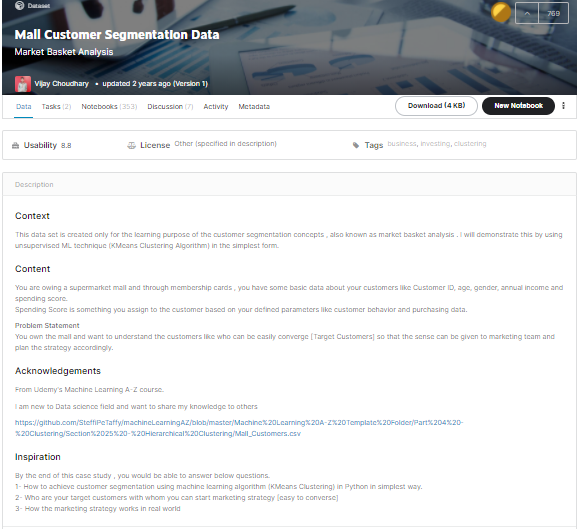




## SIMPLE AND UNDERSTANBLE USE OF K-MEANS CLASIFICATION A DATASET

### 1. LOAD DATA AND VIEW IT

In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv("datasets_42674_74935_Mall_Customers.csv")

df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
#total amount of rows and colunms

total_rows=len(df.axes[0])

print("total rows", total_rows )


total_cols=len(df.axes[1])

print("total columns", total_cols )

total rows 200
total columns 5


### 2. VISUALIZE ANNUAL INCOME VS SPENDING SCORE

In [3]:
import matplotlib.pyplot as plt

df.plot(x='Annual Income (k$)',y='Spending Score (1-100)' ,kind='line')

### 3. ENCODE MALE AND FEMALE GENDER

In [4]:
#encode male and female columns
df.Gender.replace({'Male':1,'Female':0}, inplace=True)

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## 4.using kmeans clustering to group characteristics of customer

In [6]:
#Kmeans
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

### 4(i) define cluster number

In [7]:
from sklearn.cluster import KMeans 
#Modelling
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [8]:
#Insights
#We assign the labels to each row in dataframe.
df["Clusters"] = labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


### 4(ii) check centroids

In [9]:
#We can easily check the centroid values by averaging the features in each cluster.

df.groupby('Clusters').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,,,
0,62.0,0.406504,40.325203,44.154472,49.829268
1,162.0,0.526316,40.394737,87.000000,18.631579
2,162.0,0.461538,32.692308,86.538462,82.128205


## 5. Visualize clusters

### 5(i)  Comparing clusters with the Age and Income feature

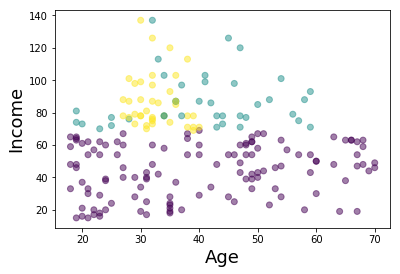

In [10]:
#Now, lets look at the distribution of customers based on their age and income:

#TO VISUIALIZE CLUSTERS with colours
plt.scatter(X[:, 1], X[:, 2], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=18)

plt.show()

#### OBSERVATIONS: THE AGE AND INCOME DATA HAVE BEEN DIVIDED INTO 3 CLUSTERS AS STATED ABOVE
#### THREE CLUSTERS WITH COLOR : YELLOW PURPLE AND GREEN

### TO GROUP DATA

#### from output above
#### There are 3 clusters

##### FIRST CLUSTER (PURPLE COLOR) CAN BE: INCOME EARNERS BTW ROUGHLY 10 TO 65 % AND AGE ROUGHLY BTW OF 10-70 YRS

###### SECOND CLUSTER((YELOW COLOR) CAN BE:  INCOME EARNERS BTW ROUGHLY 65 TO 140 % , AND AGE ROUGHLY BTW 25 TO 40 YRS

##### THIRD CLUSTER((GREEN COLOR) CAN BE:  INCOME EARNERS BTW ROUGHLY 65 TO 140 % , AND AGE ROUGHLY BTW 20 TO 60 YEARS OLD

### SO

#### FIRST CLUSTER = MIDDLE INCOME AND VERY OLD

#### SECOND CLUSTER =  HIGH INCOME AND  YOUNG

#### THIED CLUSTER = HIGH INCOME AND MIDDLE AGED



### 5(ii)  Comparing clusters with the Income and spending feature

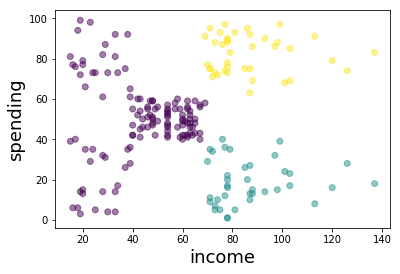

In [16]:

#Now, lets look at the distribution of customers based on their income and spending:

#TO VISUIALIZE CLUSTERS with colours
plt.scatter(X[:, 2], X[:, 3], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('income', fontsize=18)
plt.ylabel('spending', fontsize=18)

plt.show()

#### OBSERVATIONS: THE AGE AND INCOME DATA HAVE BEEN DIVIDED INTO 3 CLUSTERS AS STATED ABOVE
#### THREE CLUSTERS WITH COLOR : YELLOW PURPLE AND GREEN

### TO GROUP DATA

#### from output above
#### There are 3 clusters

##### FIRST CLUSTER (PURPLE COLOR) CAN BE: INCOME EARNERS BTW ROUGHLY 10 TO 70 % AND SPENDING ROUGHLY BTW OF 0-100

###### SECOND CLUSTER((YELOW COLOR) CAN BE:  INCOME EARNERS BTW ROUGHLY 70 TO 140 % , AND SPENDING ROUGHLY BTW 70 TO 100 

##### THIRD CLUSTER((GREEN COLOR) CAN BE:  INCOME EARNERS BTW ROUGHLY 70 TO 140 % , AND SPENDING ROUGHLY BTW 0 TO 40 

### SO

#### FIRST CLUSTER = MIDDLE INCOME AND HIGH SPENDERS

#### SECOND CLUSTER =  HIGH INCOME AND  HIGH SPENDERS

#### THIED CLUSTER = HIGH INCOME AND LOW SPENDERS

